In [1]:
from src.load import name_cleaner, season_rankings_prem_league, load_prem_financial_transfer_networks, prem_season_transfer_summary
from src.util import TransferNetwork, FinancialTransferNetwork, BasicTransfer, ClubSeasonInfo


import pandas as pd
import networkx as nx

In [2]:
prem_season_transfer_summary(2016)

[ClubSeasonInfo(name='chelsea', rank=1, transfers=[BasicTransfer(direction='in', club_involved='leicester city', fee=0.0), BasicTransfer(direction='in', club_involved='marseille', fee=0.0), BasicTransfer(direction='in', club_involved='paris sg', fee=0.0), BasicTransfer(direction='in', club_involved='fiorentina', fee=0.0), BasicTransfer(direction='in', club_involved='dinamo zagreb', fee=0.0), BasicTransfer(direction='in', club_involved='wycombe', fee=0.0), BasicTransfer(direction='in', club_involved='crystal palace', fee=0.0), BasicTransfer(direction='in', club_involved='fulham', fee=0.0), BasicTransfer(direction='in', club_involved='chelsea', fee=0.0), BasicTransfer(direction='in', club_involved='udinese calcio', fee=0.0), BasicTransfer(direction='in', club_involved='monaco', fee=0.0), BasicTransfer(direction='in', club_involved='vitesse', fee=0.0), BasicTransfer(direction='in', club_involved='kasimpasa', fee=0.0), BasicTransfer(direction='in', club_involved='fk sarajevo', fee=0.0), Ba

In [14]:
g = nx.MultiDiGraph()
g.add_edge(1, 2, fee=12)
g.add_edge(2, 3, fee=21)
g.add_edge(1, 2, fee=100)

1

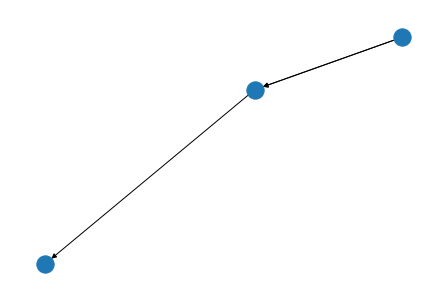

In [15]:
nx.draw(g)

In [16]:
dict(g[1][2])

{0: {'fee': 12}, 1: {'fee': 100}}